## This notebook demonstrates the various way in which the iris data set can be visualized using Seaborn and Pandas. Also we'll have a look at different machine learning algorithms  ##

In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

Iris.csv
database.sqlite



In [13]:
import seaborn as sns
import matplotlib.pyplot as plt 




In [14]:
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

In [15]:
sns.set(style="white", color_codes=True)

# Next, we'll load the Iris flower dataset, which is in the "../input/" directory
iris = pd.read_csv("../input/Iris.csv") # the iris dataset is now a Pandas DataFrame

# Let's see what's in the iris data - Jupyter notebooks print the result of the last thing you do
iris.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
iris["Species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

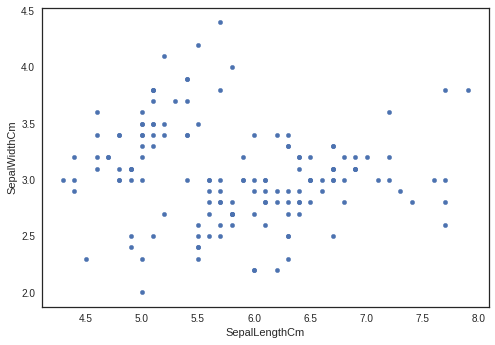

In [11]:
#Plotting using .plot function of Pandas
iris.plot(kind="scatter",x="SepalLengthCm",y="SepalWidthCm")

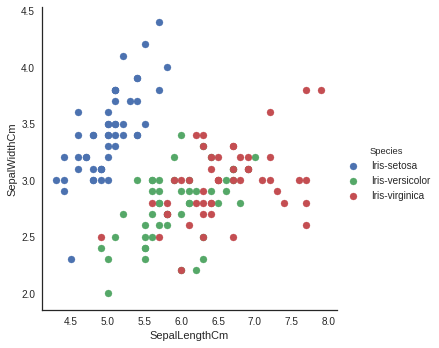

In [12]:
#Using Seaborn FacetGrid to color scatterplot based on speicies
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

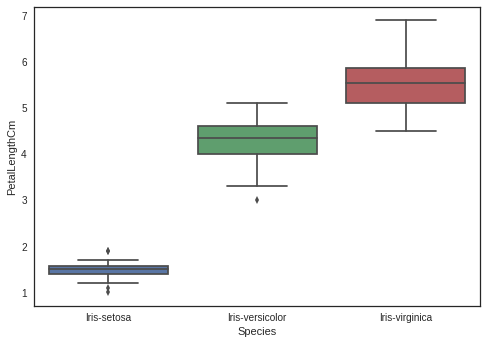

In [13]:
#Features through Seaborn's boxplot
sns.boxplot(x="Species",y="PetalLengthCm",data=iris)

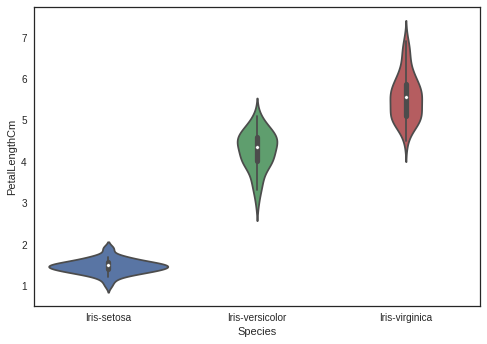

In [14]:
#Violin plot
sns.violinplot(x="Species",y="PetalLengthCm",data=iris)


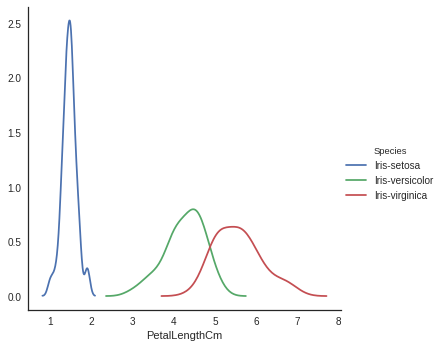

In [16]:
#A look at kdeplot which creates and visualizes density estimate of the features
sns.FacetGrid(iris,hue="Species",size=5) \
.map(sns.kdeplot,"PetalLengthCm") \
.add_legend()

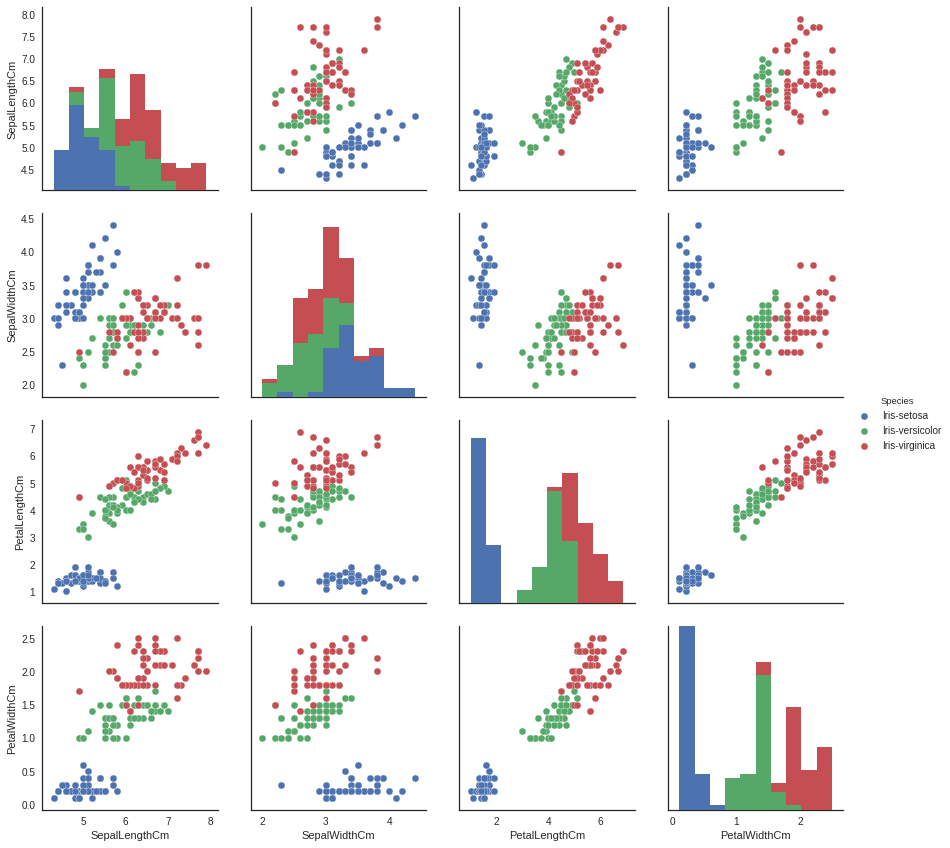

In [18]:
#A look at Seaborn's pairplot which shows bivariate releation between each pair of features
#From the plot we see that Iris-Setosa is seperated from other two  features
sns.pairplot(iris.drop("Id",axis=1),hue="Species",size=3)
    


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa35917a208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fa3589522e8>]], dtype=object)

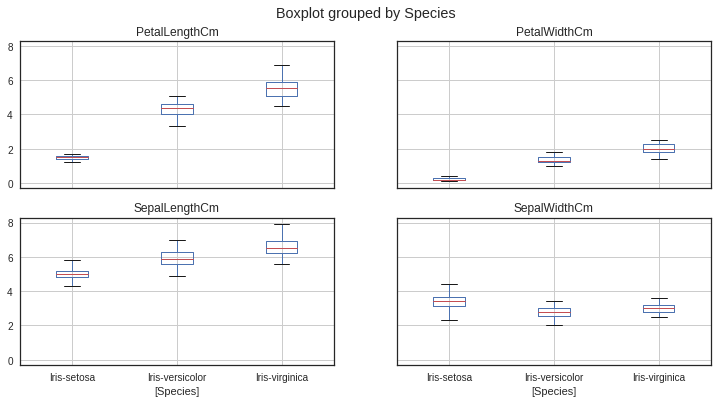

In [21]:
#Pandas boxplot for induvidual species
iris.drop("Id",axis=1).boxplot(by="Species",figsize=(12,6))

## A Look at Different Machine Learning Algorithms and Comparing their accuracy ##

In [10]:
# Importing all necessary packages
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.cross_validation import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
#shape of dataset
iris.shape

(150, 6)

## Splitting dataset into train and test data##

In [19]:
train,test=train_test_split(iris,test_size=0.3)# Dividing the dataset into 70%train and 30%test datas
print(train.shape)
print(test.shape)

(105, 6)
(45, 6)


In [20]:

train_X=train[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]] #train dataset features
train_y=train.Species

test_X=test[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]] #test dataset features
test_y=test.Species


In [22]:
#Train dataset
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
88,5.6,3.0,4.1,1.3
13,4.3,3.0,1.1,0.1
30,4.8,3.1,1.6,0.2
131,7.9,3.8,6.4,2.0
90,5.5,2.6,4.4,1.2


In [23]:
#test dataset
test_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
84,5.4,3.0,4.5,1.5
111,6.4,2.7,5.3,1.9
70,5.9,3.2,4.8,1.8
43,5.0,3.5,1.6,0.6
57,4.9,2.4,3.3,1.0


In [27]:
train_y.head()


88     Iris-versicolor
13         Iris-setosa
30         Iris-setosa
131     Iris-virginica
90     Iris-versicolor
Name: Species, dtype: object

In [28]:
test_y.head()

84     Iris-versicolor
111     Iris-virginica
70     Iris-versicolor
43         Iris-setosa
57     Iris-versicolor
Name: Species, dtype: object

## Logistic Regression ##

In [32]:
model=LogisticRegression()
model.fit(train_X,train_y)
predict=model.predict(test_X)
print("Prediction of Logistic Regression",metrics.accuracy_score(predict,test_y))


Prediction of Logistic Regression 0.955555555556


## Decision Tree  ##


In [33]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
predict=model.predict(test_X)
print("Prediction of Decision tree classifier",metrics.accuracy_score(predict,test_y))

Prediction of Decision tree classifier 0.844444444444


## K-Nearest Neighbors ##

In [34]:
model=KNeighborsClassifier(n_neighbors=5)
model.fit(train_X,train_y)
predict=model.predict(test_X)
print("Prediction of Decision tree classifier",metrics.accuracy_score(predict,test_y))

Prediction of Decision tree classifier 0.955555555556
